In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
variance = 1
w = np.array([2, 3])
b = 5

x_data = np.array([[np.random.randint(100), np.random.randint(10)] for _ in range(10000)])
y_data = np.array([np.matmul(w, x) + b + (np.random.random() * np.random.randint(variance)) for x in x_data])

In [3]:
df = pd.DataFrame({'x1': x_data[:, 0], 'x2': x_data[:, 1], 'y': y_data})
df.head()

,x1,x2,y
0,43,4,103.0
1,48,5,116.0
2,51,6,125.0
3,38,9,108.0
4,18,6,59.0


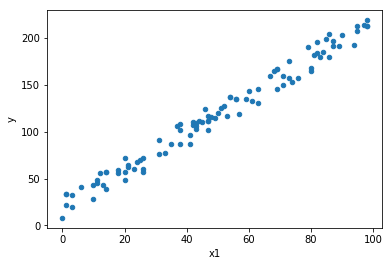

In [4]:
df.iloc[:100].plot('x1', 'y', kind='scatter')

In [5]:
_x = tf.placeholder(shape=[None, 2], dtype=tf.float32)
_y = tf.placeholder(shape=[None, 1], dtype=tf.float32)

_w = tf.Variable(tf.random_normal([2, 1]), dtype=tf.float32)
_b = tf.Variable(np.random.random(), dtype=tf.float32)

prediction = tf.matmul(_x, _w) + _b
loss = tf.reduce_mean(tf.square(_y-prediction))
optimizer = tf.train.GradientDescentOptimizer(0.0002).minimize(loss)

In [6]:
batchSize = 500
epochs = 2000
ls = []
ws = []
bs = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    pre_pred = sess.run([prediction], feed_dict={_x: x_data, _y: np.transpose([y_data])})
    
    for _ in range(epochs):
        
        currentBatch = 0
        while currentBatch <= len(x_data):
            batchX = x_data[currentBatch:currentBatch+batchSize]
            batchY = y_data[currentBatch:currentBatch+batchSize]
            currentBatch += batchSize
            sess.run([optimizer], feed_dict={_x: batchX, _y: np.transpose([batchY])})
        
        t1, t2, t3 = sess.run([loss, _w, _b], feed_dict={_x: x_data, _y: np.transpose([y_data])})
        ls.append(t1)
        ws.append(t2)
        bs.append(t3)
        
        if _ % 100 == 0:
            print('Epoch ', _)
            print('Loss: ', ls[-1])
            print('W: ', ws[-1][0], ws[-1][0])
            print('b: ', bs[-1])
            print('\n'*2)
            
    
    print('Epoch ', epochs)
    print('Loss: ', ls[-1])
    print('W: ', ws[-1][0], ws[-1][1])
    print('b: ', bs[-1])
    print('\n'*2)   
    
    post_pred = sess.run([prediction], feed_dict={_x: x_data, _y: np.transpose([y_data])})

Epoch  0
Loss:  71.72509
W:  [2.2131095] [2.2131095]
b:  0.5533407



Epoch  100
Loss:  2.209381
W:  [2.0332642] [2.0332642]
b:  1.2408015



Epoch  200
Loss:  1.7245383
W:  [2.0293846] [2.0293846]
b:  1.6787938



Epoch  300
Loss:  1.3460956
W:  [2.0259612] [2.0259612]
b:  2.0657501



Epoch  400
Loss:  1.0507053
W:  [2.0229363] [2.0229363]
b:  2.4076169



Epoch  500
Loss:  0.8201303
W:  [2.0202641] [2.0202641]
b:  2.7096584



Epoch  600
Loss:  0.64015585
W:  [2.0179033] [2.0179033]
b:  2.9765048



Epoch  700
Loss:  0.49967548
W:  [2.0158172] [2.0158172]
b:  3.2122643



Epoch  800
Loss:  0.39002475
W:  [2.0139742] [2.0139742]
b:  3.4205558



Epoch  900
Loss:  0.30443448
W:  [2.012346] [2.012346]
b:  3.6045787



Epoch  1000
Loss:  0.23762685
W:  [2.0109076] [2.0109076]
b:  3.7671573



Epoch  1100
Loss:  0.18548074
W:  [2.0096369] [2.0096369]
b:  3.9107969



Epoch  1200
Loss:  0.14477745
W:  [2.008514] [2.008514]
b:  4.037702



Epoch  1300
Loss:  0.113008104
W:  [2.0075219] [2.

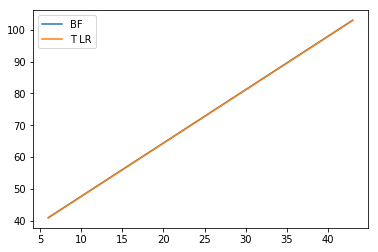

In [7]:
plt.plot([x_data[0, 0], x_data[100, 0]], [y_data[0], y_data[100]])
plt.plot([x_data[0, 0], x_data[100, 0]], [np.array(post_pred).reshape(-1)[0], np.array(post_pred).reshape(-1)[100]])
plt.legend(['BF', 'T LR', 'NT LR'])

In [8]:
print('Initial Loss: ', mean_absolute_error(y_pred=np.array(pre_pred).reshape(-1), y_true=y_data))
print('Final Loss: ', mean_absolute_error(y_pred=np.array(post_pred).reshape(-1), y_true=y_data))

Initial Loss:  161.12128582738043
Final Loss:  0.11526825456619262
